# Homework 5

### Name: Kavana Manvi Krishnamurthy
### Student ID: 2158984

## 1.	PCA for Reduced Dimensionality in Clustering [Dataset: segmentation_data.zip]
For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.
Your tasks in this problem are the following:


## a.	[5 pts] Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [5]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans 

In [6]:
df = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW4/segmentation_data/segmentation_data.txt", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902


In [7]:
import pandas as pd

# Read the segmentation classes from the specified file
df_classes = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW4/segmentation_data/segmentation_classes.txt", header=None, delimiter='\t')

# Display the first 3 rows
df_classes.head(3)


,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0


In [8]:
df_names = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW4/segmentation_data/segmentation_names.txt", header=None)

# Display the first 3 rows
df_names.head(3)


,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
# Convert the normalized numpy array back to a DataFrame
df_norm = pd.DataFrame(df_norm)
# Now use the head() method to display the first 10 rows
df_norm.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.430830,0.741667,0.0,0.0,0.0,0.034221,0.000672,0.027329,0.000856,0.090111,0.079417,0.061119,0.130943,0.731343,0.014118,0.872865,0.123711,0.508139,0.831849
1,0.335968,0.733333,0.0,0.0,0.0,0.038023,0.000726,0.032298,0.000541,0.095791,0.085089,0.068483,0.134840,0.729478,0.023529,0.859583,0.127393,0.463329,0.836986
2,0.885375,0.970833,0.0,0.0,0.0,0.115970,0.002213,0.067081,0.001097,0.085463,0.075365,0.061856,0.120031,0.736940,0.038824,0.827324,0.113402,0.480149,0.844782


## b.	[10 pts] Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visualization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.


cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=names.values.flatten())

In [13]:
from sklearn.cluster import KMeans
import pandas as pd

In [14]:
# Perform KMeans clustering with K = 7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df_norm)

KMeans(n_clusters=7, random_state=42)

In [15]:
# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

In [16]:
# Convert centroids to a DataFrame for better readability
centroids_df = pd.DataFrame(cluster_centroids, columns=df_norm.columns)

In [17]:
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_names.values.flatten())

In [18]:
# Print formatted centroids
print("Cluster Centroids:")
print(centroids_df.to_string(float_format="{:.4f}".format))

Cluster Centroids:
      0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18
0 0.5140 0.8089 0.0000 0.0774 0.0051 0.0545 0.0014 0.0463 0.0014 0.1088 0.0914 0.0924 0.1427 0.6792 0.0790 0.8213 0.1349 0.4145 0.8923
1 0.5351 0.1502 0.0000 0.0278 0.0017 0.0302 0.0005 0.0268 0.0006 0.8232 0.7797 0.8942 0.7888 0.2707 0.6664 0.2894 0.8942 0.2118 0.1251
2 0.3025 0.5309 0.0000 0.0523 0.0466 0.1008 0.0094 0.0840 0.0110 0.4006 0.3703 0.4725 0.3530 0.4971 0.5709 0.2131 0.4725 0.3023 0.1639
3 0.2512 0.3934 0.0000 0.0754 0.0193 0.0780 0.0044 0.0623 0.0053 0.1473 0.1374 0.1842 0.1175 0.7184 0.3436 0.3547 0.1845 0.4141 0.2028
4 0.7483 0.5320 0.0000 0.0392 0.0377 0.1135 0.0189 0.1073 0.0176 0.2986 0.2775 0.3501 0.2638 0.5933 0.4492 0.3115 0.3502 0.3030 0.1644
5 0.7691 0.4259 0.0000 0.0140 0.0227 0.0397 0.0030 0.0231 0.0021 0.0404 0.0344 0.0574 0.0281 0.7799 0.2228 0.4869 0.0584 0.5392 0.2450
6 0.2542 0.4594 0.0000 0.0264 0.0138

In [19]:
display(cluster_centroids)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,131.040404,205.144781,9.0,0.025814,0.001122,1.591844,1.395540,2.072203,1.942208,15.605312,12.532361,13.944258,20.339319,-9.218855,-4.983165,14.202020,20.355032,0.414491,2.271143
1,136.380000,47.040000,9.0,0.009259,0.000370,0.883333,0.538392,1.197037,0.813307,118.090124,106.907778,134.920373,112.442223,-33.547037,50.490741,-16.943704,134.920373,0.211804,-2.299201
2,77.533898,138.406780,9.0,0.017420,0.010358,2.946092,9.342202,3.755414,15.309615,57.465003,50.778719,71.289078,50.327213,-20.058851,41.472222,-21.413371,71.289078,0.302263,-2.068003
3,64.556548,105.407738,9.0,0.025132,0.004299,2.279597,4.399700,2.784226,7.413396,21.127425,18.833333,27.795304,16.753638,-6.882275,20.003638,-13.121362,27.842262,0.414107,-1.836332
4,190.313253,138.689759,9.0,0.013052,0.008367,3.317604,18.765677,4.799197,24.436824,42.828648,38.051205,52.823293,37.611446,-14.332329,29.983936,-15.651606,52.835676,0.303047,-2.065143
5,195.572816,113.223301,9.0,0.004675,0.005034,1.160194,2.957906,1.033801,2.903298,5.793000,4.720245,8.658756,4.000000,-3.218267,8.597267,-5.379000,8.806185,0.539152,-1.584866
6,65.300000,121.251724,9.0,0.008812,0.003065,1.075096,2.014409,1.190038,2.289403,3.684674,2.400766,6.337165,2.316092,-3.851724,7.957471,-4.105747,6.474713,0.803157,-1.969552


In [20]:
cluster_labels = kmeans.fit_predict(df_norm)

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [22]:
# Compute Silhouette scores
silhouette_vals = silhouette_samples(df_norm, cluster_labels)
silhouette_vals

array([ 0.5723009 ,  0.56096434,  0.46537332, ..., -0.05409331,
        0.13391168,  0.02319869])

In [23]:
#Compute average Silhouette score
avg_silhouette_score = silhouette_score(df_norm, cluster_labels)
print(f"Average Silhouette Score: {avg_silhouette_score:.4f}")

Average Silhouette Score: 0.3320


In [24]:
#visualization
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import sklearn.metrics as metrics
import pylab as pl

#Now let's do the same with the Silhouette coeffiecients
def plot_silhouettes(data, clusters, metric='euclidean'):
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    print("The average silhouette value is: ",str(silhouette_avg))
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

The average silhouette value is:  0.3320233761933512


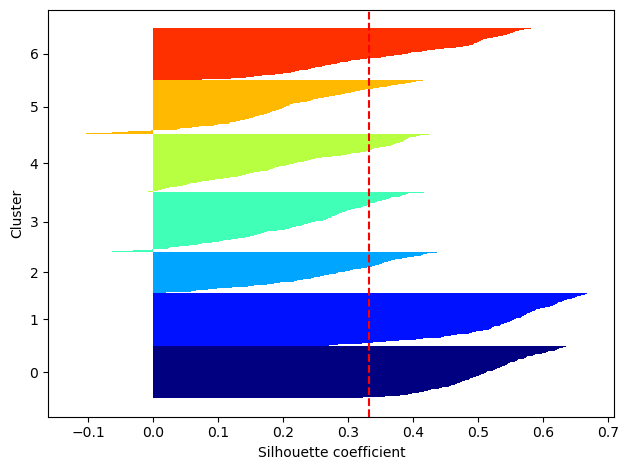

In [25]:
clusters = kmeans.predict(df_norm)
plot_silhouettes(df_norm,clusters)

In [26]:
from sklearn.metrics import completeness_score, homogeneity_score

In [27]:
# Compute Completeness and Homogeneity
completeness = completeness_score(df_classes.iloc[:,1], kmeans.labels_)
homogeneity = homogeneity_score(df_classes.iloc[:,1], kmeans.labels_)

# Print the results
print(f"Completeness: {completeness:.4f}")
print(f"Homogeneity: {homogeneity:.4f}")

Completeness: 0.6117
Homogeneity: 0.6100


## c.	[10 pts] Do your own experiments with the number of clusters to see if a different value of K results in more cohesive clustering based on Silhouette analysis. Please do not provide all your clustering results, but you should include the best result according to your analysis and provide a brief discussion of why this particular clustering was selected.


The number of clusters is:  2
The average silhouette value is:  0.46368935319705523


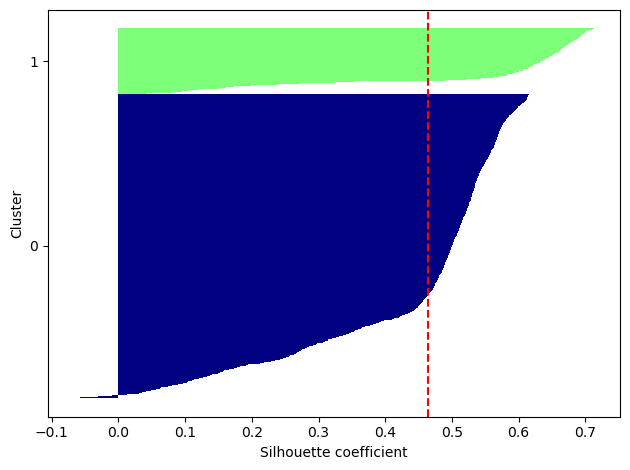

The number of clusters is:  3
The average silhouette value is:  0.36132024376217237


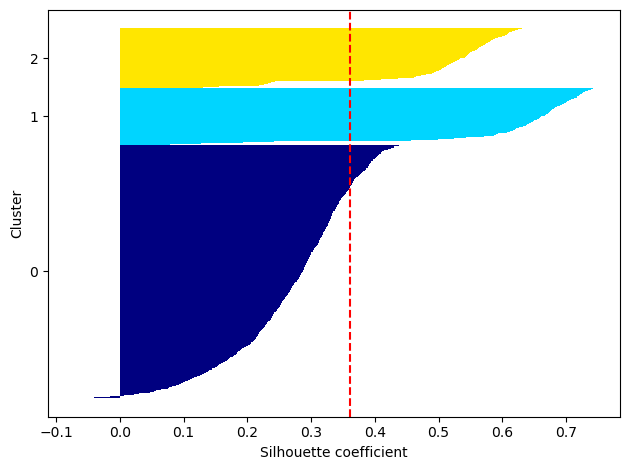

The number of clusters is:  4
The average silhouette value is:  0.3814325870077951


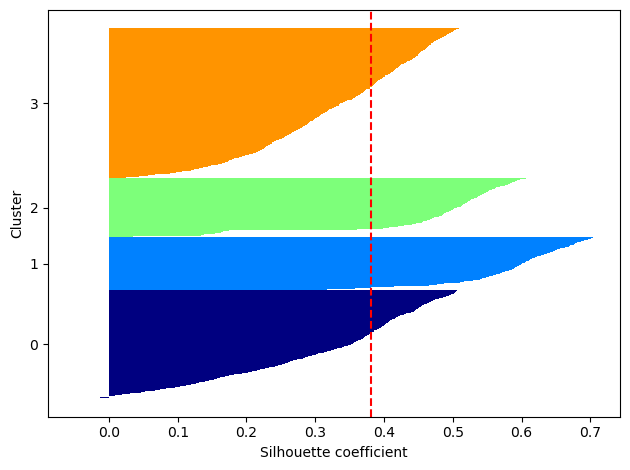

The number of clusters is:  5
The average silhouette value is:  0.32326828118486567


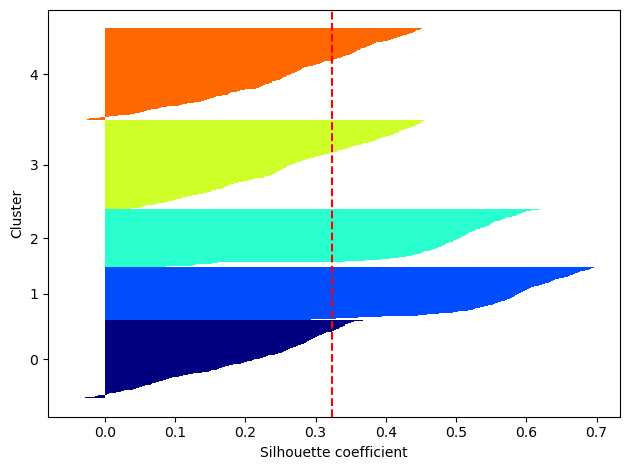

The number of clusters is:  6
The average silhouette value is:  0.28353865044217264


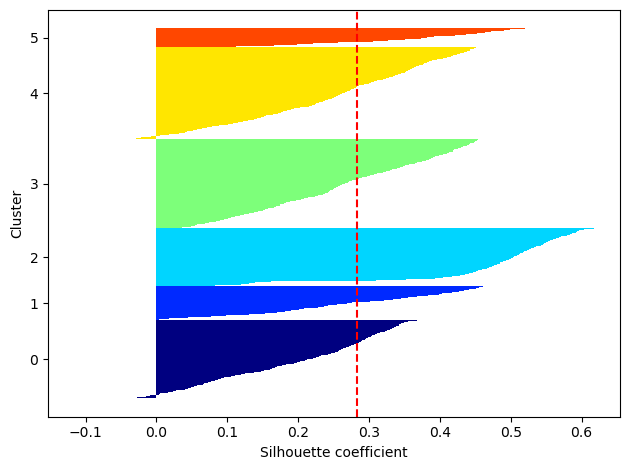

The number of clusters is:  7
The average silhouette value is:  0.25743204265301706


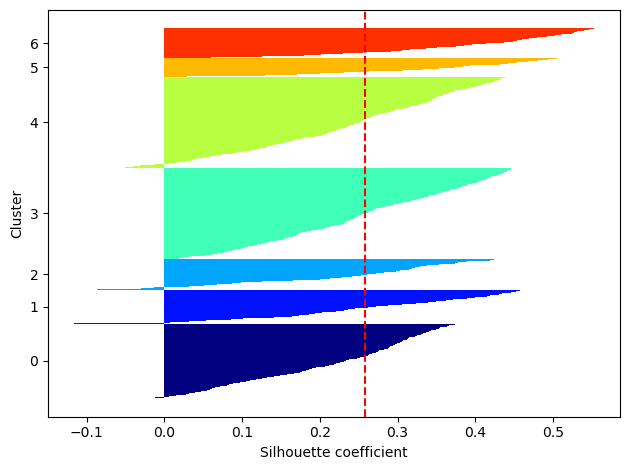

The number of clusters is:  8
The average silhouette value is:  0.2922932396630831


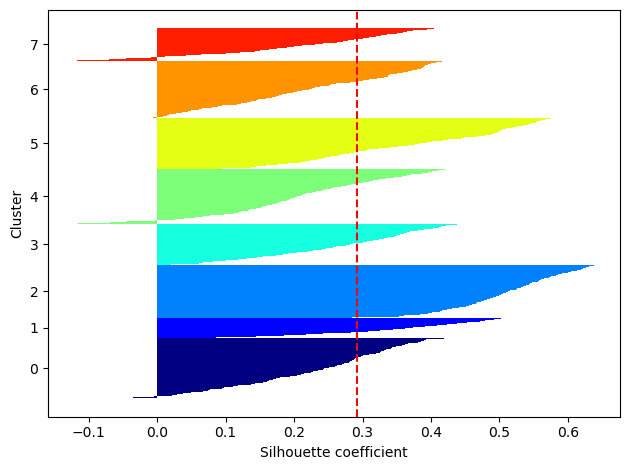

The number of clusters is:  9
The average silhouette value is:  0.29464338574399285


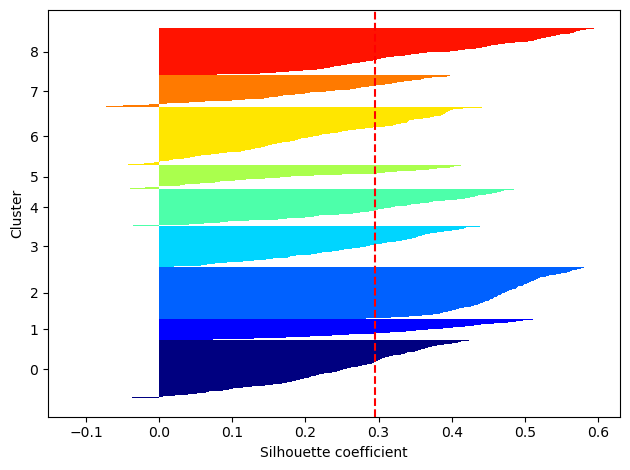

The number of clusters is:  10
The average silhouette value is:  0.28848065288253577


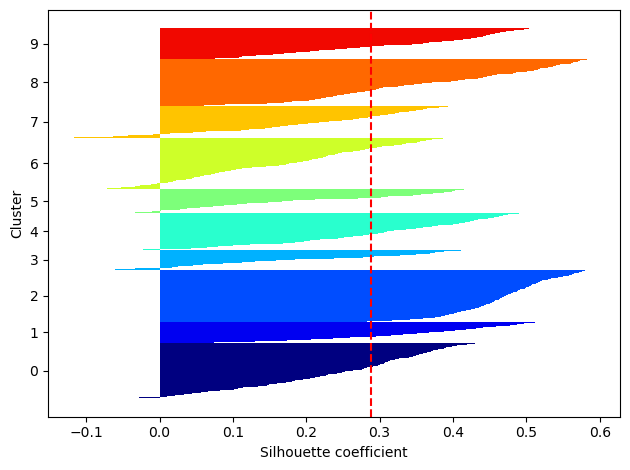

In [29]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_norm)
    clusters = kmeans.predict(df_norm)
    print("The number of clusters is: ",str(k))
    plot_silhouettes(df_norm,clusters)

In [30]:
print("The best number was chosen based on the heighest average silhouette value")
print("The number of clusters is:  2 "+" \n"+"The average silhouette value is:  0.46368935319705523")

The best number was chosen based on the heighest average silhouette value
The number of clusters is:  2  
The average silhouette value is:  0.46368935319705523


## d.	[10 pts] Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a Scree plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.


In [32]:
# Step 1: Perform PCA using NumPy
X = df_norm.values
mean = np.mean(X, axis=0)
X_centered = X - mean
cov_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [33]:
# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [34]:
# Step 2: Analyze principal components
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [35]:
# Determine number of PCs needed for 95% variance
r = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of PCs needed for 95% variance: {r}")

Number of PCs needed for 95% variance: 7


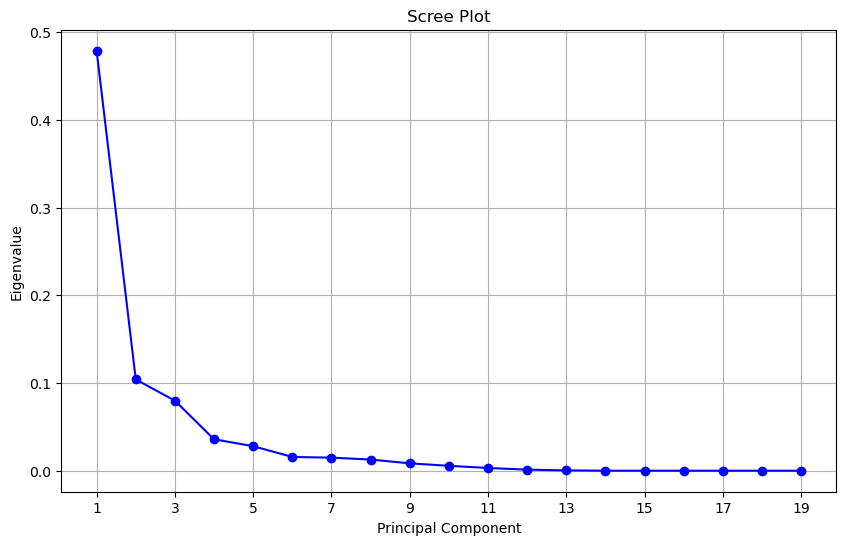

In [36]:
# Step 3: Create Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues) + 1, 2))
plt.grid(True)
plt.show()

In [37]:
# Step 4: Transform data into reduced dimension space
reduced_data = X_centered.dot(eigenvectors[:, :r])

In [38]:
# Create a new dataframe with reduced dimensions
columns = [f'PC{i+1}' for i in range(r)]
df_reduced = pd.DataFrame(reduced_data, columns=columns)

print("\nFirst few rows of the reduced dimension data:")
print(df_reduced.head())


First few rows of the reduced dimension data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.689082 -0.532951 -0.246098  0.197812 -0.076433 -0.047804 -0.047321
1 -0.666920 -0.510675 -0.337972  0.174381 -0.041178 -0.056551 -0.041707
2 -0.712027 -0.770944  0.155822  0.009299 -0.166622 -0.043814 -0.060695
3 -0.732419 -0.505378 -0.496928  0.056917 -0.144469 -0.026348 -0.097034
4 -0.642317 -0.531329 -0.300672  0.177615 -0.018240 -0.054663 -0.055545


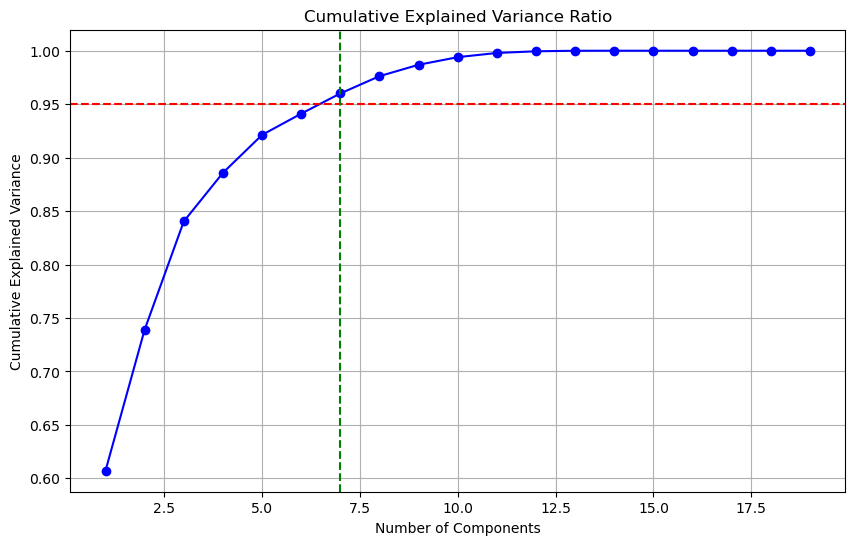

In [39]:
# Additional visualization: Cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=r, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## e.	[5 pts] Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.


In [41]:
# Perform KMeans clustering with K = 7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df_reduced)

KMeans(n_clusters=7, random_state=42)

In [42]:
# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

In [43]:
# Convert centroids to a DataFrame for better readability
centroids_df = pd.DataFrame(cluster_centroids, columns=df_reduced.columns)

In [44]:
# Print formatted centroids
print("Cluster Centroids:")
print(centroids_df.to_string(float_format="{:.4f}".format))

Cluster Centroids:
      PC1     PC2     PC3     PC4     PC5     PC6     PC7
0 -0.6193 -0.6402 -0.1958  0.0869 -0.0678 -0.0089  0.0384
1  1.4145 -0.0872 -0.0368  0.1732 -0.0299  0.0090 -0.0216
2  0.1502 -0.0345  0.2679 -0.1737  0.0363 -0.0124 -0.0032
3 -0.4293  0.3123 -0.1441  0.0483  0.0067  0.0161 -0.0023
4  0.2826  0.0344 -0.1765 -0.3576 -0.1007  0.0241 -0.0512
5  0.4814  0.1918 -0.1346 -0.0673  0.0610 -0.0638  0.1069
6 -0.5002  0.0754  0.3332  0.0657  0.0693 -0.0018 -0.0242


In [45]:
cluster_labels = kmeans.fit_predict(df_reduced)

In [46]:
# Compute Silhouette scores
silhouette_vals = silhouette_samples(df_norm, cluster_labels)
silhouette_vals

array([0.58184528, 0.57355642, 0.47133012, ..., 0.0157423 , 0.15579884,
       0.04752486])

In [47]:
#Compute average Silhouette score
avg_silhouette_score = silhouette_score(df_reduced, cluster_labels)
print(f"Average Silhouette Score: {avg_silhouette_score:.4f}")

Average Silhouette Score: 0.3446


The average silhouette value is:  0.3185292814183078


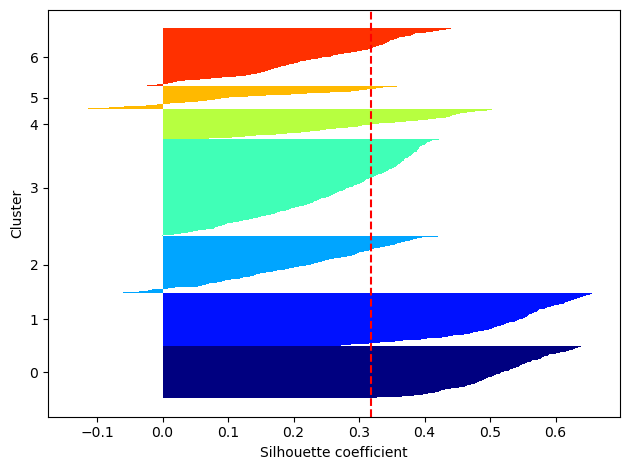

In [48]:
clusters = kmeans.predict(df_reduced)
plot_silhouettes(df_norm,clusters)

In [49]:
# Compute Completeness and Homogeneity
completeness = completeness_score(df_classes.iloc[:,1], kmeans.labels_)
homogeneity = homogeneity_score(df_classes.iloc[:,1], kmeans.labels_)

# Print the results
print(f"Completeness: {completeness:.4f}")
print(f"Homogeneity: {homogeneity:.4f}")

Completeness: 0.6695
Homogeneity: 0.6401


PCA-reduced data (0.6695) shows higher completeness than full data (0.6117).
Full data (0.3320) shows a slightly higher silhouette score than PCA-reduced data (0.3185).
PCA has improved the clustering performance in terms of completeness and homogeneity. This suggests that the reduced dimensions have captured the most relevant information for separating classes.
The slight decrease in the silhouette score with PCA indicates that while the classes are better separated, the overall cluster structure (in terms of within-cluster similarity and between-cluster dissimilarity) is slightly less defined in the reduced space.

# 2.	Item-Based Joke Recommendation [Dataset: jokes.zip]
For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality.
The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.
Your tasks in this problem are the following (please also see comments for the function stubs in the provided module):


### a.	[15 pts] Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures. Note the differences. Use the standard item-based collaborative filtering (based on the rating prediction function "standEst"). Next, find the top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version (using "svdEst" as the prediction engine) to generate these recommendations. Note the differences. When outputting recommendations, you should show both the id and the text of the recommended jokes (in decreasing order of predicted rating) as well as the predicted ratings for each.


In [53]:
pd.set_option('display.max_colwidth', 120)

jokes = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW4/jokes/jokes.csv", usecols=[1], header=None)
jokes.head(10)

,1
0,"A man visits the doctor. The doctor says ""I have bad news for you.You have cancer and Alzheimer's disease"". The man ..."
1,This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing....
2,Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert.
3,Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.
4,Q. What's O. J. Simpson's Internet address? A.\tSlash slash backslash slash slash escape.
5,Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the...
6,How many feminists does it take to screw in a light bulb?That's not funny.
7,Q. Did you hear about the dyslexic devil worshipper? A. He sold his soul to Santa.
8,A country guy goes into a city bar that has a dress code and the maitred' demands he wear a tie. Discouraged the guy...
9,"Two cannibals are eating a clown one turns to other and says: ""Does this taste funny to you?"


In [54]:
def get_joke_text(jokes, id):
	return np.array(jokes)[id]

In [55]:
print(get_joke_text(jokes, 98))

['A bus station is where a bus stops.A train station is where a train stops.On my desk I have a work station...']


In [56]:
dataMat = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW4/jokes/modified_jester_data.csv", header=None)

dataMat.shape

(1000, 100)

In [57]:
pd.set_option('display.max_colwidth', 40)

dataMat.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
5,4.83,7.46,11.44,2.50,3.91,6.68,2.31,10.13,4.35,9.20,...,7.46,4.11,10.32,8.04,8.82,7.65,11.05,1.92,5.95,7.55
6,0.00,0.00,0.00,0.00,19.59,1.15,18.72,19.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.00,0.00,0.00
7,17.84,14.16,20.17,4.79,2.84,9.30,20.27,12.41,5.81,6.58,...,18.23,9.88,10.90,5.32,7.84,7.65,13.14,10.95,12.31,11.00
8,7.21,7.46,1.58,4.11,2.26,10.71,5.71,2.07,3.14,9.40,...,15.37,10.71,15.17,10.71,10.71,10.71,10.71,10.71,7.60,6.05
9,14.01,16.15,16.15,14.01,17.41,16.15,19.93,13.52,14.01,19.16,...,0.00,15.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [58]:
from numpy import *
from numpy import linalg as la
import numpy as np

In [59]:
def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))


In [60]:
def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]


In [61]:
def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

In [62]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [63]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [64]:
def recommend(dataMat, user, N=3, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [65]:
dataMat = np.mat(dataMat)
dataMat

matrix([[ 3.18, 19.79,  1.34, ...,  0.  ,  0.  ,  0.  ],
        [15.08, 10.71, 17.36, ..., 11.34,  6.68, 12.07],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [16.58, 16.63, 15.85, ...,  0.  ,  0.  ,  0.  ],
        [ 3.67,  4.45,  3.67, ...,  3.77,  3.77,  3.28],
        [ 9.88, 11.73,  9.16, ...,  0.  ,  0.  ,  0.  ]])

In [66]:
# Check the shape of dataMat
print("Shape of dataMat:", dataMat.shape)

Shape of dataMat: (1000, 100)


In [67]:
user_id = 4
recommendations = recommend(dataMat, user_id, N=5, simMeas=pearsonSim, estMethod=standEst)
# Print the recommendations
print(f"Recommendations for user {user_id}:")
for joke_id, rating in recommendations:
    joke_text = get_joke_text(jokes, joke_id)
    print(f"Joke ID: {joke_id}")
    print(f"Joke: {joke_text}")
    print(f"Predicted Rating: {rating}\n")

Recommendations for user 4:
Joke ID: 71
Joke: ['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"']
Predicted Rating: 14.413443009309447

Joke ID: 75
Joke: ["There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. The 

In [68]:
user_id = 4
recommendations = recommend(dataMat, user_id, N=5, simMeas=cosineSim, estMethod=standEst)

# Print the recommendations
for joke_id, rating in recommendations:
    joke_text = get_joke_text(jokes, joke_id)
    print(f"Joke ID: {joke_id}")
    print(f"Joke: {joke_text}")
    print(f"Predicted Rating: {rating}\n")

Joke ID: 71
Joke: ['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"']
Predicted Rating: 14.293754381681559

Joke ID: 75
Joke: ["There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. The man took a really big drink 

/var/folders/b2/s6cq43q964gcjk0fp440gx_h0000gn/T/ipykernel_69768/2487990520.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = float(inA.T * inB)


In [69]:
user_id = 25
recommendations = recommend(dataMat, user_id, N=5, simMeas=pearsonSim, estMethod=standEst)

# Print the recommendations
for joke_id, rating in recommendations:
    joke_text = get_joke_text(jokes, joke_id)
    print(f"Joke ID: {joke_id}")
    print(f"Joke: {joke_text}")
    print(f"Predicted Rating: {rating}\n")

Joke ID: 99
Joke: ["Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen."]
Predicted Rating: 15.324673571007686

Joke ID: 71
Joke: ['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"']
Predicted Rating: 15.324296950553675

Joke ID: 97
Joke: ["Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages 

In [70]:
user_id = 25
recommendations = recommend(dataMat, user_id, N=5, simMeas=pearsonSim, estMethod=svdEst)

# Print the recommendations
for joke_id, rating in recommendations:
    joke_text = get_joke_text(jokes, joke_id)
    print(f"Joke ID: {joke_id}")
    print(f"Joke: {joke_text}")
    print(f"Predicted Rating: {rating}\n")

Joke ID: 3
Joke: ["Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it."]
Predicted Rating: 15.27708815474947

Joke ID: 79
Joke: ['Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy."']
Predicted Rating: 15.238062599769167

Joke ID: 72
Joke: ["Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference."]
Predicted Rating: 15.209188661833453

Joke ID: 71
Joke: ['On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-b

### b.	[15 pts] Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function) and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function (in both cases using Pearson similarity measure. Note that this may take several minutes depending on your computational environment. [Note: See comments provided in the module for hints on accomplishing these tasks.]


In [72]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
	dataMat = np.array(dataMat)
	number_of_items = np.shape(dataMat)[1]
	rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
	test_size = int(test_ratio * len(rated_items_by_user))
	test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
	withheld_items = rated_items_by_user[test_indices]
	original_user_profile = np.copy(dataMat[user])
	dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
	error_u = 0.0
	count_u = len(withheld_items)

	# Compute absolute error for user u over all test items
	for item in withheld_items:
		# Estimate rating on the withheld item
		estimatedScore = estMethod(dataMat, user, simMeas, item)
		error_u = error_u + abs(estimatedScore - original_user_profile[item])	
	
	# Now restore ratings of the withheld items to the user profile
	for item in withheld_items:
		dataMat[user, item] = original_user_profile[item]
		
	# Return sum of absolute errors and the count of test cases for this user
	# Note that these will have to be accumulated for each user to compute MAE
	return error_u, count_u

In [73]:
print(cross_validate_user(dataMat, user=0, test_ratio=0.2, estMethod=standEst, simMeas=pearsonSim))

(80.63961606498557, 14)


In [74]:
def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    # Write this function to iterate over all users and for each perform evaluation by calling
	# the above cross_validate_user function on each user. MAE will be the ratio of total error 
	# across all test cases to the total number of test cases, across all users
    total_error = 0.0
    total_count = 0
    num_users = np.shape(dataMat)[0]  # Get the number of users

    # Iterate over each user to compute the error and count
    for user in range(num_users):
        error_u, count_u = cross_validate_user(dataMat, user, test_ratio, estMethod, simMeas)
        total_error += error_u
        total_count += count_u

    # Calculate MAE
    if total_count == 0:
        return float('inf')  # Return infinity if there are no test cases to avoid division by zero
    mae = total_error / total_count
    return mae

In [75]:
mae = test(dataMat, test_ratio=0.2, estMethod=standEst, simMeas=pearsonSim)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 3.7212785228384746


In [76]:
mae = test(dataMat, test_ratio=0.2, estMethod=svdEst, simMeas=pearsonSim)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 3.6778016071318476


### c.	[15 pts] Write a new function "print_most_similar_jokes" which outputs the most similar jokes (based on user ratings) to a specified query joke. You function should take as input the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function. It should output the text of the query joke as well as the texts of the top k most similar jokes in decreasing order of similarity (you should also provide the similarity values). Test your function as follows:

     * Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.
     * Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

[Note: see comments at the end of the provided module as well as comments for the provided stub function.]



In [78]:
def cosineSim(inA, inB):
    num = float(np.dot(inA.T, inB))  # Use np.dot for vector dot product
    denom = la.norm(inA) * la.norm(inB)
    return 0.5 + 0.5 * (num / denom)


In [79]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    dataMat = np.array(dataMat)
    n_jokes = dataMat.shape[1]
    similarities = []
    
    query_ratings = dataMat[:, queryJoke]
    
    for i in range(n_jokes):
        if i != queryJoke:
            joke_ratings = dataMat[:, i]
            sim = metric(query_ratings, joke_ratings)
            similarities.append((i, sim))
    
    similarities.sort(key=lambda x: x[1], reverse=True)
    top_k = similarities[:k]
    
    print(f"Selected joke:\n\n{get_joke_text(jokes, queryJoke)}\n")
    print(f"Top {k} Recommended jokes are:\n")
    
    for joke_id, sim in top_k:
        print(f"{get_joke_text(jokes, joke_id)}")
        print(f"Similarity: {sim:.4f}\n")

In [80]:
# Test the function
print("Using Pearson similarity:")
print_most_similar_jokes(dataMat, jokes, 9, 3, pearsonSim)

Using Pearson similarity:
Selected joke:

['Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? ']

Top 3 Recommended jokes are:

['A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"']
Similarity: 0.7614

["Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer..."]
Similarity: 0.7584

['A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wishes she also had a picture of Amal.  Her husband responds "But they are twins-if you\'ve seen Juan you\'ve seen   Amal.']
Similarity: 0.7541



In [81]:
print("\nUsing Cosine similarity:")
print_most_similar_jokes(dataMat, jokes, 9, 3, cosineSim)


Using Cosine similarity:
Selected joke:

['Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? ']

Top 3 Recommended jokes are:

["Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer..."]
Similarity: 0.9290

['May I take your order? the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they\'re going to die."']
Similarity: 0.9284

['A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"']
Similarity: 0.9269



### d.	[15 pts] The implementation of item-based collaborative filtering provided in the module is not scalable since for each prediction it attempts to compute pairwise similarities among all items. Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure such as a pairwise similarity matrix. Your training function should be able to use different similarity functions (passed as a parameter) including cosine Similarity or Pearson correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities matrix computed in the training phase. It should then return the predicted rating on the target item for the target user. The predicted rating should be the weighted average of the target user's ratings on the k most similar items to the target item (obtained from the similarity matrix). Demonstrate that your function works by computing predicted ratings for users 4 and 25, using k = 10, on top two items recommended to each user on part a (using both Pearson and cosine similarities).


In [83]:
def recommender_train(matrix, similarity_measure):
    num_items = np.shape(matrix)[1]
    similarity_matrix = np.zeros((num_items, num_items))
    matrix = np.mat(matrix)
    
    for item1 in range(num_items):
        for item2 in range(num_items):
            common_users = np.nonzero(np.logical_and(matrix[:, item1] > 0, matrix[:, item2] > 0))[0]
            if len(common_users) == 0:
                similarity_matrix[item1, item2] = 0
            else:
                similarity_matrix[item1, item2] = similarity_measure(matrix[common_users, item1], matrix[common_users, item2])
    
    return similarity_matrix


In [84]:
def recommender_estimator(matrix, user_id, target_item, k, similarity_matrix):
    num_items = np.shape(matrix)[1]
    total_similarity = 0.0
    weighted_ratings_sum = 0.0
    data_matrix = np.mat(matrix)
    
    similar_items = np.argsort(similarity_matrix[target_item])[::-1]
    
    for item in similar_items:
        user_rating = data_matrix[user_id, item]
        if user_rating == 0:
            continue
        
        common_users = np.nonzero(np.logical_and(data_matrix[:, target_item] > 0, data_matrix[:, item] > 0))[0]
        if len(common_users) == 0:
            similarity = 0
        else:
            similarity = similarity_matrix[target_item, item]
        
        total_similarity += similarity
        weighted_ratings_sum += similarity * user_rating
    
    if total_similarity == 0:
        return 0
    else:
        return weighted_ratings_sum / total_similarity


In [85]:
simMatrixPearson = recommender_train(dataMat,pearsonSim)
simMatrixcosine= recommender_train(dataMat,cosineSim)

/var/folders/b2/s6cq43q964gcjk0fp440gx_h0000gn/T/ipykernel_69768/64137828.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = float(np.dot(inA.T, inB))  # Use np.dot for vector dot product


In [86]:
k=10
#user 4 pearson
print(recommender_estimator(dataMat,4,71,k,simMatrixPearson))
print(recommender_estimator(dataMat,4,75,k,simMatrixPearson))

14.413443009309448
14.397311198445284


In [87]:
# user 4 cosine
print(recommender_estimator(dataMat,4,71,k,simMatrixcosine))
print(recommender_estimator(dataMat,4,75,k,simMatrixcosine))

14.293754381681566
14.293605672411006


In [88]:
#user 25 pearson
print(recommender_estimator(dataMat,25,99,k,simMatrixPearson))
print(recommender_estimator(dataMat,25,71,k,simMatrixPearson))

15.32467357100769
15.324296950553675


In [89]:
#user 25 pearson
print(recommender_estimator(dataMat,25,99,k,simMatrixcosine))
print(recommender_estimator(dataMat,25,71,k,simMatrixcosine))

15.246812052221651
15.246235511518535


### e.	[Extra Credit - 10 pts] Modify the "cross_validate_user" and  "test" functions as necessary to use the new version of the prediction function (from part d). First test the prediction accuracy of your prediction function (similarly to part b, above) using both cosine and Pearson similarity measures. Next, provide a plot of cross-validation accuracies across a range of values of k. (running the "test" function for each value of k). Your plot may look similar to this example. Next, Modify the "recommend" function to use your new prediction function. Using the best observed value of k from your plot demonstrate the functionality of your recommender by generating top 3 recommendations for users 4 and 25.
